## Multiple Linear Regression and Regression Error Metrics

## Import library

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')

In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Birgül\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


## Read Dataset

In [5]:
df = pd.read_csv("Advertising.csv")  #tv, radyo ve gazeteden reklam harcamalarinin toplamindan elde edilen kazanc
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# supervised modellerde ben modele hedef (target) veriyorum.
# Bu data seti için 200 gözlem ve 200 hedef var.
# Ulaşman gereken değerler (TARGET) bunlar. Bu hedeflere göre kurallarını (B) belirle diyorum.
# Model target olan SALES e ulaşabilmek için feature lara TV-RADIO-NEWSPAPER a kural olarak ortak bir B (katsayı) belirliyor

## Data Preparation

In [6]:
df.shape

(200, 4)

In [7]:
df.info()   #datamiz bir machine learning algoritmasina verilmeye hazir mi diye bakiyoruz,future lar sayisal olmali missing value olmamali

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.describe()   #outlier var mi diye bakiyoruz, std mean e yakinsa büyük bir outlier tehlikesi olabilir diye düsünüyoruz
              #mean > median ise saga carpik diyebiliriz

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Distribution of features

# mean ve std değerleri birbirine çok yakın ise veya std mean den büyük ise o feature da outlier problemi olabilir
# o feature gözden geçirilmeli
# min ile Q1 arasında veya Q3 ile max arasında uçurum varsa yine outlier işaretidir.
# outlier olduğu zaman lineer çizgisi outlier istikametinde kayar
# çok fazla feature varsa birkaç outlier modelimi etkilemez. 
# Sentetik veri ile çalışmak yerine bu birkaç değer atılabilir.
# EDA iyi yapıldıktan sonra zaten buna gerek kalmıyor.
# ML sihirli bir değnek değil. EDA olayın %75-80 dir. (GARBAGE IN GARBAGE OUT)

# lineer regression uygulayabilmemiz için kabul edilebilir skewness aralığı -1 ile +1 arasındadır.
# eğer skew değerim -0.5 ile +0.5 arasında bir değerde ise ise normal dağılımdan bahsedebiliriz
# dolayısıyla lineer regression için uygundur. 
# 0.5 ile 1 arasında ise orta seviyede (moderate) skewness olduğunu söyleyebiliriz. 
# bu durumda da lineer regression kullanabiliriz ama -/+ 1 den büyük ise lineer reg. uygulayamayız. 

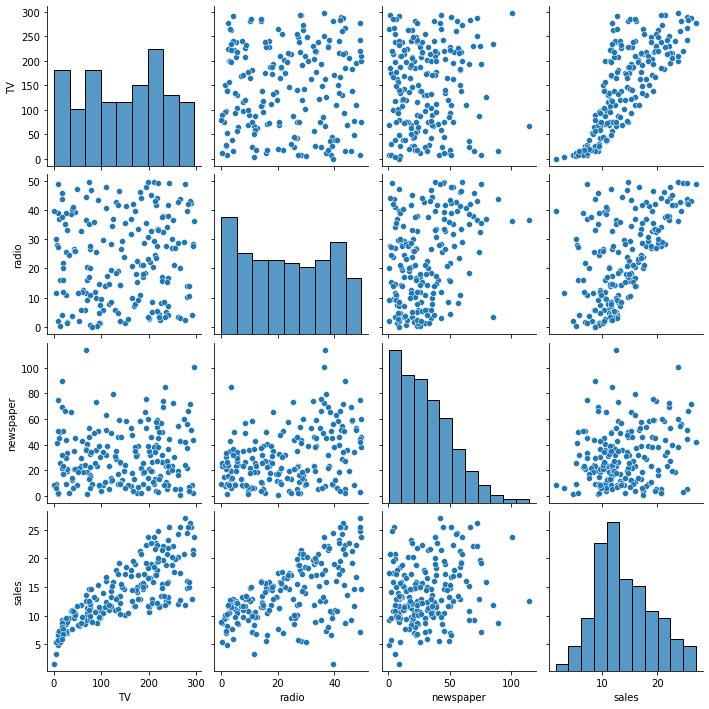

In [15]:
sns.pairplot(df);

tv daha cok linearity e uygun gazete hic uygun degil, radyo ise az uygun, tv ile sales arasinda sebep sonuc iliskisi var

In [9]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

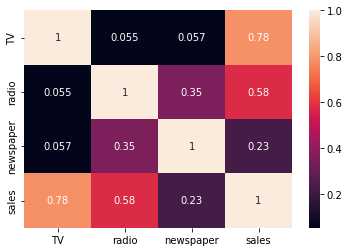

In [10]:
sns.heatmap(df.corr(), annot = True)

In [ ]:
# Multiple linear regresyonda doğrudan korelasyona bakıp çıkarımda bulunamıyorum.
# Korelasyon ile beraber residual dağılıma bakmam gerekiyor.

## Train-Test Split

In [21]:
# pip install scikit-learn   #modelimize datamizi train ile egitip sonra test ile kontrol edecegiz
                            #traditional de hem girdi hem kural veriliyor, maschine learning de model verilenlerden kural cikarmaya calisiyor

# test_size = 0.2 ile datamın yüzde 30'unun test verisi olarak ayırdım.

# random_state=42 ile 42'yi kullandığım her defasında aynı train ve test datasını alacak. 
# mesela aynı datada çalışırken takım arkadaşlarınızla skorlarınızı karşılaştırabilmeniz için bunu aynı rakam girmelisin. 
# ki anlamlı bir karşılaştırma yapabilesiniz.

In [15]:
X = df.drop(columns ="sales") #df[["TV", "radio", "newspaper"]]   #sadece target i düsürdüm
y = df["sales"]

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)
#train leri egitim asamasinda kullanacagiz,testleri ise makine modelin mantigini aldiysa güzel sonuclar vermek icin kullanacagiz
#default u 0.25 dir,gözlem seti kucuk ise 0.1 kullanilmali,train setine max veri saglamaliyiz
#random 42 yi ayni kümelemeyi yapmak icin , sabitlemek icin kullaniyoruz(numpy seed gibi)

In [18]:
df.sample(15)

,TV,radio,newspaper,sales
37,74.7,49.4,45.7,14.7
156,93.9,43.5,50.5,15.3
161,85.7,35.8,49.3,13.3
183,287.6,43.0,71.8,26.2
136,25.6,39.0,9.3,9.5
133,219.8,33.5,45.1,19.6
75,16.9,43.7,89.4,8.7
3,151.5,41.3,58.5,18.5
30,292.9,28.3,43.2,21.4
56,7.3,28.1,41.4,5.5


In [19]:
print("Train features shape : ", X_train.shape)     #200 satiri 5 e böldük 40 icin test satiri 160 satirda train yapiyor,test size i 20 diye belirledigimiz icin
print("Train target shape   : ", y_train.shape)     #40 i test 160 i train e ayrildi
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (160, 3)
Train target shape   :  (160,)
Test features shape  :  (40, 3)
Test target shape    :  (40,)


# X_train ve y_train üzerine model eğitiliyor.
# Eğitilmiş model X_test üzerinde çalıştırılıyor ve metric ler alınıyor.

In [20]:
X_train

,TV,radio,newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [21]:
X_test

,TV,radio,newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2
115,75.1,35.0,52.7
69,216.8,43.9,27.2
170,50.0,11.6,18.4
174,222.4,3.4,13.1
45,175.1,22.5,31.5


In [22]:
y_train

79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: sales, Length: 160, dtype: float64

In [23]:
y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
Name: sales, dtype: float64

## Model Fitting and Compare Actual and Predicted Labels

In [24]:
from sklearn.linear_model import LinearRegression   # --> Burada model objesi oluşturduk. model kurma denilen kavram bu.

In [27]:
model = LinearRegression()     #bir degiskene atamak zorundayiz yoksa  egitim yaptigimiz modele predict islemi yapamayiz

In [28]:
model.fit(X_train, y_train)    #egitimi bu kod ile yaptiriyoruz

LinearRegression()

# burada artık datayı modele fit ediyorum
# eğitimi train seti ile yaptırıyorum
# model feature ve target yoluyla eğitiliyor. 
# hedefe ulaşmak için uygun katsayıları belirliyor

In [29]:
y_pred = model.predict(X_test) #sadecex_test kismini veriyorum y degerlerini model tahmin edecek
y_pred

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [30]:
model.coef_        #tv,radio,newspaper yani future sirasina göre modeli döndürür,her bir feature ait katsayilari verdi

array([0.04472952, 0.18919505, 0.00276111])

In [31]:
model.intercept_

2.979067338122629

In [217]:
# y_pred = b3 * TV + b2 * radio + b1 * newspaper + b0   #b0 intercept y= b0+b1.x  ; burda y sales b0 intercept,b1 newspaper)

In [33]:
sum(X_test.loc[95] * model.coef_) + model.intercept_  #saglamasini yapiyoruz

16.408024203228628

Tahminlerim basarili mi ona bakacagim, LSE ile ABS yi karsilastiracagim

In [34]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Residual":y_test-y_pred, "LSE":(y_test-y_pred)**2, "ABS": abs(y_test-y_pred)}

In [35]:
comparing = pd.DataFrame(my_dict)
comparing

,Actual,Pred,Residual,LSE,ABS
95,16.9,16.408024,0.491976,0.242040,0.491976
15,22.4,20.889882,1.510118,2.280456,1.510118
30,21.4,21.553843,-0.153843,0.023668,0.153843
158,7.3,10.608503,-3.308503,10.946189,3.308503
128,24.7,22.112373,2.587627,6.695812,2.587627
115,12.6,13.105592,-0.505592,0.255623,0.505592
69,22.3,21.057192,1.242808,1.544572,1.242808
170,8.4,7.461010,0.938990,0.881702,0.938990
174,11.5,13.606346,-2.106346,4.436693,2.106346
45,14.9,15.155070,-0.255070,0.065061,0.255070


In [36]:
result_sample = comparing.iloc[:, :3]
result_sample

,Actual,Pred,Residual
95,16.9,16.408024,0.491976
15,22.4,20.889882,1.510118
30,21.4,21.553843,-0.153843
158,7.3,10.608503,-3.308503
128,24.7,22.112373,2.587627
115,12.6,13.105592,-0.505592
69,22.3,21.057192,1.242808
170,8.4,7.461010,0.938990
174,11.5,13.606346,-2.106346
45,14.9,15.155070,-0.255070


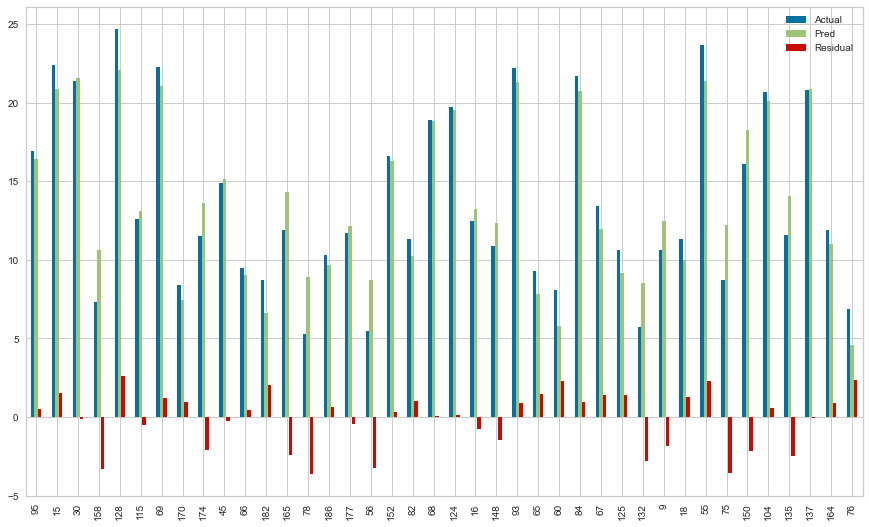

In [222]:
result_sample.plot(kind ="bar", figsize=(15,9))
plt.show()

## Error Metrics

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [38]:
R2_score = r2_score(y_test, y_pred)   #R2 score target i elde etmek icin gerekli bilginin ne kadararina sahibim onu gösteriyor,aciklana varyans %90 cikmis
R2_score                              # % 90 bilgiye sahibim anlami var. 1 ciksaydi aciklanmayan deger yok demektir
                                     #target sütununun diger sütunlarca(features) aciklanma yüzdesi

0.899438024100912

# elimdeki veriler doğru tahmin yapmak için 89% oranında yeterli.

# dependent değerdeki değişikliğin % 89 u bağımsız değişkenler ile açıklanabiliyor. 

# geriye kalan %11 ü ise belirlenemeyen nedenlerden kaynaklı. 
# adamın banyosunda altın küvet vardır evin fiyatı olması gerektiğinden fahiştir. ama bu bilgi bizde yok.
# burada çoğunluğa bakmak gerekli. data genelinde pred ler iyi. birkaç kötü tahmin modeli etkilemez.

# kalan %11 lik bilgi kaybı (açıklanmayan varyans) --> % 11, tüm gözlemler için ortak değer.
# residual açıklanamayan varyansı gösterir.
# prediction ile actual değer arasındaki fark (residual) açıklanamayan varyanstan kaynaklanmaktadır

# ML de amaç min feature ile max scoru elde etmek
# feature sayısı arttıkça modelin complexity si artıyor
# komlexity nin artması overfitting underfitting vb değişik sorunlara neden oluyor.
# boyut artması aynı zamanda computational power olarakta daha fazla yük getirir, model yavaş çalışır

# Ne zaman EDA ya dönmeliyim?

# EDA nın kaliteli olup olmadığı modele girdiğinde belli oluyor.
# Skorları aldıktan sonra skorlar yeterli değilse müşteriye gittim yeni gözlemler istedim
# yeni gözlemleri ekledim yeniden modelleme yaptım
# hyperparameter tuning yaptım
# diğer modellerle skor aldım
# yapılabilecek herşeyi yaptım skor düzelmedi. 
# Bu şartlarda EDA ya dönülüp gözden geçirilebilir.

# MAE

# Hataları fazla cezalandırmıyor
# İnterpret kolay. Target ile aynı birimde.

In [39]:
mae = mean_absolute_error(y_test, y_pred) #comparing.ABS.sum()/X_test.shape[0], (1.46 target ima göre 146 bin dolarlik hata yapiyor demek)
mae

1.4607567168117603

In [40]:
X_test.shape    #ilk deger satir sayisi 2. ise sütunu verir(ilk gözlem sayisi,2. future)

(40, 3)

In [284]:
# comparing.ABS.sum()/X_test.shape[0]  

#MSE
# hataların karesini alıyor
# modelin hataları büyür ve görünür hale geliyor
# İnterpret zor. Target ile aynı birimde değil. 
# 2 modelin karşılaştırılması için kullanılır

In [41]:
mse = mean_squared_error(y_test, y_pred) # comparing.LSE.sum()/X_test.shape[0]  #sadece 2 modeli karsilastirirken hangisi kücükse o daha dogru sonuc veriyor
                                        # diyebiliriz, bu deger bana target sütunundaki birimin karesi olarak sonuc veriyor. Bu yüzden kare kökünü aliyoruz
mse                              #2 farkli modelin performansini karsilastirmak icin kullaniliyor

3.1740973539761033

In [286]:
#comparing.LSE.sum()/X_test.shape[0]

In [230]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) #(comparing.LSE.sum()/X_test.shape[0])**0.5
rmse                  #hem cezalandirmayi yapar hem yorumlamayi

1.7815996615334502

In [42]:
(comparing.LSE.sum()/X_test.shape[0])**0.5    #ayni degeri döndürür

1.78159966153345

In [43]:
sales_mean = df["sales"].mean()   #target imin ortalamasi
sales_mean

14.0225

# sales ortalamam 14 idi, mae ortalamam 1.5 idi. 1.5'u 14'e bölersem 1.5'un 14'ün yüzde kaçı olduğunu bulmuş olurum.
# modelim ortalama MAE ye göre ortalama %10 hata yapıyor

In [233]:
mae / sales_mean

0.10417234564533855

# RMSE

# hataların karesini ardından karekökünü alıyor
# modelin hataları büyür ve görünür hale geliyor
# İnterpret kolay. Target ile aynı birimde. 
# Hataları cezalandırır

In [234]:
rmse / sales_mean  #yapilan kötü tahminleri de dikkate aldigi icin bunu almak daha mantikli
#rmse mae ye ne kadar yakinsa tahminim o kadar dogruya yakindir,genelde bu ikisini kullanacagiz 
#rmse kötü tahminleri de isin icine katiyor o yüzden bunu kullanmak gerekli
# modelim ortalama RMSE ye göre ortalama %12 hata yapıyor

0.12705292647769298

## Adjusted R2 score 

https://towardsdatascience.com/demystifying-r-squared-and-adjusted-r-squared-52903c006a60

# gözlem sayısınız az feature sayısının fazla olduğu datalarda R2 skorda sahte bir iyileşme görülür
# bu hatayı problemi ortadan kaldırmak gereklidir

In [44]:
def adj_r2(y_test, y_pred, X):    #ne kadar feature sayisi artarsa gözlem sayim da artiyorsa iyilesme oluyor gibi görünse de buna güvenmemek gerek, 
                              #ama gözlem sayim azsa adj_r2 score kontrol etmeliyim
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0] # number of observations (rows)  (gözlem sayim)
    p = X.shape[1] # number of independent variables (future sayim)
    #(yeni bir feature ilave edersek fiyatlari iyi tahmin edebilmesi icin ona göre gözlem sayisini artirmak gerek)
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [45]:
X.shape

(200, 3)

In [46]:
adj_r2(y_test, y_pred, X)

0.8978988101840892

# adjusted R2 ve R2 skorlar arasında çok fazla büyük bir fark yok
# burada örnek olarak datanın row ve feature sayısındaki değişiklikler adj_r2 skorunu etkileyecektir.

# daha çok küçük datalarda dummies benzeri yeni feature lar eklendiğinde adj_r2 skor kontrol edilir

## What is the concept of punishment for RMSE error metric?

In [47]:
variables = {"Actual": [1000, 2000, 3000, 4000, 5000], "pred": [1100, 2200, 3200, 4200, 6000]}
#6000 yerine 5200 yazinca sonuclar birbirine daha yakin cikiyor, o zaman tahminler daha iyi yapilmis demektir

In [48]:
df_2 = pd.DataFrame(variables)
df_2

,Actual,pred
0,1000,1100
1,2000,2200
2,3000,3200
3,4000,4200
4,5000,6000


In [50]:
df_2["residual"] = abs(df_2.Actual - df_2.pred)

In [51]:
df_2

,Actual,pred,residual
0,1000,1100,100
1,2000,2200,200
2,3000,3200,200
3,4000,4200,200
4,5000,6000,1000


In [52]:
#mae
df_2.residual.sum()/5 #200

340.0

In [53]:
#rmse
((df_2.residual**2).sum()/5)**0.5 #209.76

475.3945729601885

In [ ]:
#mae rmse arasindaki fark yüksekse modelimde yapilan kötü tahminler var demek
#ama birbirine yakinsa tahminler iyi yapilmistir diyebiliriz

# Outlier benzeri bir değerin skorları nasıl etkilediğini gördük
# rmse bize modelin genel durumu hakkında bu şekilde sinyal veriyor

## Evaluation Model

In [56]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score : {R2_score}")
    print(f"MAE {'':<5}: {mae}")   #bu kisimlar görsellestirmeyi güzellestirmek icin kullaniliyor
    print(f"MSE {'':<5}: {mse}")
    print(f"RMSE{'':<5}: {rmse}")

In [58]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score : 0.899438024100912
MAE      : 1.4607567168117603
MSE      : 3.1740973539761033
RMSE     : 1.78159966153345


In [60]:
y_train_pred = model.predict(X_train) 
 #modele egitim vermistim bir de o data setinde tahmin yaptiriyorum
 #eger sonuc birbirine yakin cikiyorsa  modelim mantigi kavramis diyorum
 #yukaridaki train seti test setine yakinsa mantigi anlamis diyorum
 #test seti ile train seti birbirine uygun cikmali

In [61]:
eval_metric(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score : 0.8957008271017818
MAE      : 1.1984678961500137
MSE      : 2.705129423081414
RMSE     : 1.644727765644337


y_train skorlarının çoğunlukla daha iyi çıkması beklenir. 

çünkü train yaparken bu datayı kullandığı için bu veriler üzerinde eğitim yaptığı için bu verileri gördüğü için.. 
(fakat her zaman değil)

fakat ben görmediğim veriler üzerinde de modelimden iyi skorlar alabiliyorum.

burada modelimin test datası ile yaptığımda elde ettiğim skor, train data ile yaptığıma yakın olduğu için optimal bir başarıyı yakaladık diyebiliriz. 

Yani test setinden aldığım değerle train setinden aldığımız değeri kıyaslıyoruz. 

Bu değerler ne kadar yakınsa modelimin başarı oranı o kadar iyidir.

# modelim ezberlemiş mi yoksa iyi bir şekilde öğrenmiş mi? test ve train skorlarının karşılaştırması ile buluyoruz.

# modelin ezberleyip ezberlemediğini train ve test setleri arasında skor açısından büyük farklar ve train skorlarının
# daha iyi olması durumunda anlarız
# soruları ezberlemiş ama görmediği sorularda hayal kırıklığı yaşıyor

# önemli olan modelin genelleme yapabilmesi

 Is data suitable for linear regression?#target dagilimi ve future dagilim ayni ise ya da benzerse normal dagilima uygundur diyebiliriz

https://stats.stackexchange.com/questions/12262/what-if-residuals-are-normally-distributed-but-y-is-not

Plotting residuals

In [62]:
residuals = y_test-y_pred

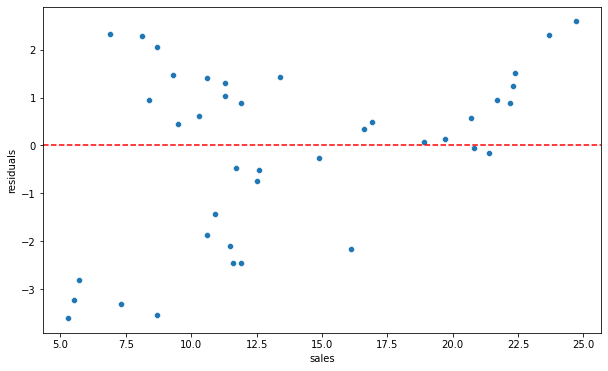

In [63]:
plt.figure(figsize = (10,6))   #ortadan gecen farklarin 0 oldugu yer, yukaridaki ve asagidaki dagilim birbirine yakin olacak
sns.scatterplot(x = y_test, y = residuals) #-residuals  #asagidaki sekil normal dagilima uygun gibi
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

# Residual değerleri kırmızı çizginin her iki tarafında ne kadar normal dağılmışsa, 
# çizginin altındaki değerlerler ile üstündeki değerler birbirini götürecek şekilde ise (toplamı 0 veya 0'a yakın ise)  
# yani linearity ne kadar fazla ise veri linear modele o kadar uygundur


# genel olarak bilmemiz gereken residual grafiğinde;

# 1. herhangi bir patern OLMAMALI
# 2. 0'ın üstüde ve altında eşit bir dağılım olmalı  --> böyle ise linear regression'a uygun bir datanız var demektir.

<AxesSubplot:xlabel='sales', ylabel='Density'>

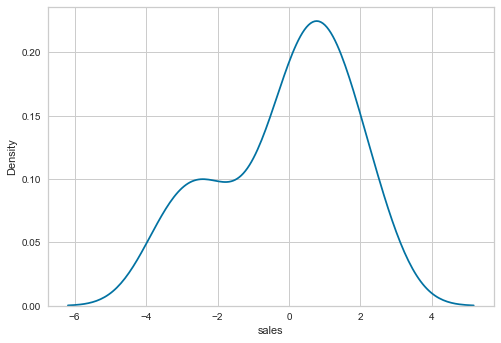

In [250]:
sns.kdeplot(residuals)   #normal dagilim mi diye bundan da bakabiliriz, asagisi gercek deger, dikey eksen ise gercek-tahmin edilen deger

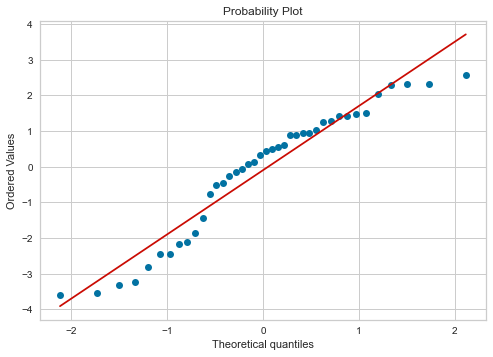

In [251]:
stats.probplot(residuals, dist ="norm", plot =plt); #bu sekil de normal dagilima uygun mu diye gösteriyor, 
#dagilim ortadan gecen cizgi etrafinda yogunlasiyorsa normale uygun dagilimdir

# değerlerim line etrafında bir sarmaşık gibi dolanmışsa burda normal dağılım var diyebiliriz. 
# ama bir tarafta sapma (line'dan uzaklaşma) varsa normal dağılımdan uzaklaşmış demektir.

In [64]:
from scipy.stats import skew  #numpy numeric python , scipy scientific python
skew(residuals)

-0.5399061927739792

# lineer regression uygulayabilmemiz için kabul edilebilir skewness aralığı -1 ile +1 arasındadır.

# eğer skew değerim -0.5 ile +0.5 arasında bir değerde ise ise normal dağılımdan bahsedebiliriz 
# ve dolayısıyla lineer regression için uygundur. 

# 0.5 ile 1 arasında ise orta seviyede (moderate) skewness olduğunu söyleyebiliriz. 
# bu durumda da lineer regression kullanabiliriz ama -/+ 1 den büyük ise lineer reg. uygulayamayız. 

In [66]:
!pip install yellowbrick
#conda install -c districtdatalabs yellowbrick  (conda kullananlar yukardaki kodda hata alırsa bu kodu yükleyip devam edebilir)

You should consider upgrading via the 'C:\Users\Birgül\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


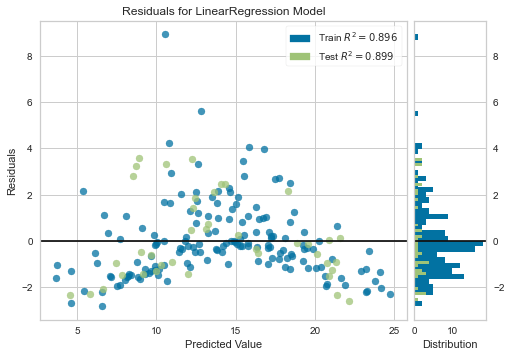

In [67]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();        # Finalize and render the figure

# hangi modelin linear Reg için daha uygun olup olmadığını anlamak için bu grafikleri tek tek çizdirmeye gerek yok. 

# diğer modeller ile kıyaslayıp karar vermemiz gerek ama interview larda sorarlarsa corr ve normal dağılıma 
# benzerliği ile karar vermemiz gerektiğini aklımızda bulunduralım.

## Prediction Error for LinearRegression

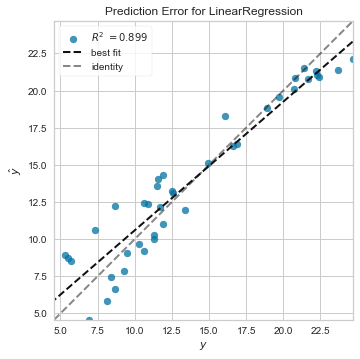

In [68]:
from yellowbrick.regressor import PredictionError  #gercek degerler ile tahmin edilen degere göre best fit line ciziyor,
# Instantiate the linear model and visualizer    #ortadan gecene benim best fit line ne kadar yakinsa o kadar iyi
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();    

# silik olan line, değerlerin mükemmel olduğu sonuç. 
# siyah olan ise lineer regressyonunuzdan sonucunda çıkan sonuç. 
# bunlar üst üste bindiği zaman modelinizden rahatlıkla emin olabilirsiniz.

# grafiğe bakarak modelimi hangi değerlerin bozduğunu rahatlıkla görebilirim.

## Retraining Model on Full Data

In [72]:
final_model = LinearRegression()    #en iyi modele karar verdikten sonra skora tüm datamla gidiyorum, final modeli tüm datamla egittim

In [73]:
final_model.fit(X, y)

LinearRegression()

eğitimimi tamamladıktan ve model validation'u geçtikten (yani modelimden emin olduktan ve hangi modeli seçeceğime karar verdikten sonra) artık son aşamada tüm datamı kullanarak fit yapıyorum.

çünkü modelimi ne kadar büyük data ile eğitirsem  o kadar iyi sonuç alırım ( o kadar daha kesin ve sağlıklı bir predict veren modelim olur)

Hangi modeli seçmem gerektiğine karar verdikten sonra, modeli tüm data ile eğitirim. Çünkü ne kadar fazla data ile eğitirsem o kadar daha kesin ve sağlıklı bir predict yapan algoritma oluştururum.

validation'u bir önceki adımda test datam ile geçti. modelimden emin oldum ve ona karar verdim. o yüzden artık emin olduğum modelimi daha büyük data ile eğitiyorum.

## Coefficients

In [74]:
final_model.coef_    #tv,radyo ve gazetenin katsayilarini buluyorum, mesela radyodaki 1 birimlik artis target imda ne kadar artisa sebep veriyor
                     #hangi katsayi büyükse genelde o önemli veri denilebiliyor

array([ 0.04576465,  0.18853002, -0.00103749])

# Feature lardaki bir birimlik artışın target üzerinde ne kadarlık bir artış yaptığını katsayılar gösteriyor.
# bu katsayıları aynı zamanda feature importance tespitinde kullanıyoruz.

# newspaper negatif. katsayıları tek tek değerlendirmemek gerekli. 
# burada tv-radio-newspaper 3 lü olarak değerlendirmek gerekli
# bu 3 lü değişim içinde - etkiye sahip görünüyor.

In [75]:
final_model.intercept_

2.938889369459412

In [76]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [77]:
coeff_df = pd.DataFrame(final_model.coef_, index = X.columns, columns = ["Coefficient"] )

In [78]:
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


## Prediction on New Data

# ML modellerininh hepsi 2 boyutlu ınput ister
# 2 boyutlu hale getirmek reshape ile yapılabildiği gibi aşağıdaki gibi de olabilir

In [79]:
adv = [[150, 20, 15]]  #2 paranteze alip 2 boyutlu hale getiriyorum

In [268]:
adv

[[150, 20, 15]]

In [269]:
final_model.predict(adv)   #bana bir sales sonucu tahmin etti

array([13.55862413])

In [270]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [271]:
final_model.intercept_

2.9388893694594085

In [272]:
sum(final_model.coef_ * [150, 20, 15]) + final_model.intercept_

13.558624130495996

In [273]:
adv_2 = [[150, 20, 15], [160, 20, 15]] #tv yi 10 birim artirmam digerlerini sabit birakmam 10 kati artisa sebep oldu

In [274]:
final_model.predict(adv_2)

array([13.55862413, 14.01627059])

In [275]:
14.01627059 - 13.55862413   # 10 kat artti, bir feature degerindeki degisimin target üzerindeki degisimini gördük

0.4576464599999994

## The effect of features on the predicted label

In [80]:
coeff_df    #en büyük katsayi radyo, hangi future önemli onu belirlemek icin bir scale islemi yapmaliyim
            #yoksa bu sekilde bakmak bizi yaniltabilir,min future ile max score elde etmek en iyi yöntemdir,modellemede amac budur

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


In [320]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [321]:
df.corr()    #corr yüksek feature target ile sadece linear reg modeli icin önemli ,en önemli odur diyebiliriz(ama sadece linear reg de böyle)

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


# describe() sonuçlarına göre feature ların mean değerlerine bakınca aralarında farklılıklar var.
# bu yanlış değerlendirmelere neden olabilir
# bu nedenle katsayıları doğru yorumlayabilmek için scale / standardizasyon yapmak gerekiyor.

# feature lar aynı scale de olmadığından katsayılar üzerinden değerlendirme yapmak yanlış olur.